**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**1**. (10 points) 

Rewrite the following code into functional form using lambdas, map, filter and reduce.

In [3]:
n = 10
s = 10
for i in range(n):
    if i % 2:
        s |= i**2
s

123

In [4]:
from functools import reduce
s = 10
n = 10
reduce(lambda x,y: x|y, map(lambda i: i**2, filter(lambda i: i%2, list(range(n)))), s)

123

**2**. (10 points)

Rewrite the code above as a `toolz` pipeline, using lambdas and curried or partially applied functions as necessary.

In [5]:
import toolz as tz
import toolz.curried as c
from functools import partial
n = 10
s = 10
tz.pipe(
    n,
    range,
    list,
    c.filter(lambda i: i%2),
    c.map(lambda i: i**2),
    c.map(partial(lambda x,y: x|y, 10)),
    c.reduce(lambda x,y: x|y)
)

123

**3**. (10 points) 

Repeat the Buffon's needle simulation from Lab01 as a function that takes the number of needels `n` as input and returns the estimate of $\pi$. The function should use `numpy` and vectorization.  What is $\pi$ for 1 million needles?

In [6]:
import numpy as np
np.random.seed(123)
L = 1
D = 2
d_center = np.random.uniform(0, D/2, 1000000)
d_angle = np.random.uniform(0, np.arcsin(1), 1000000)

d = L/2 * np.sin(d_angle)
j = d_center - d
P = len(j[j<0])/1000000
pi = (2*L)/(P*D)
print('The estimate of pi is {}'.format(pi))

The estimate of pi is 3.1432998991000733


**4**. (20 points) 

Simpsons rule is given by the follwoing approximation

![Simpsons](https://wikimedia.org/api/rest_v1/media/math/render/svg/a0cdf0804bb8810e4438cbea898dc7a2fedb3e57)

- Write Simpsons rule as a function `simpsons(f, a, b, n=100)` where n is the number of equally spaced intervals from `a` to `b`.  (10 points)
- Use this function to estimate the probability mass of the standard normal distribution between -1 and 1. Implement the PDF of the standard normal distribution $\psi(x)$ as a function. (10 points)

$$
\psi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$

In [41]:
def simpson(f, a, b, n=100):
    """Use Simpsons's rule to slove numerical calculation.
    
    The numerical approximation of f(from a to b) integration.
    
    arg1 = f
    arg2 = starting point of interval being calculated
    arg3 = ending point of interval being calculated(include)
    keyarg: n = 100, default number of equally spaced intervals from a to b
    
    Returns the approximation of f integration.
    
    Example usage:
    
    f = lambda x: x, list(range(1,3))
    simpson(f, 1, 2) 
    0.5
    
    """
    x = np.linspace(a, b, 101)
    h = (b-a)/n
    
    idx_odd = [i for i in range(1,100) if i%2!=0 ]
    idx_even = [i for i in range(2,100) if i%2==0 ]
    f_simpson = (f(a)+np.sum(f(x[idx_odd]))*2+np.sum(f(x[idx_even]))*4+f(b))*h/3
    return f_simpson

In [42]:
def f_test(x):
    return np.exp(-x**2/2)/(np.sqrt(2*np.pi))
simpson(f_test, -1, 1)

0.67943095175624924

In [40]:
x = np.linspace(-1, 1, 101)

array([ 0.])

**5**. (50 points)

Write code to generate a plot similar to the following 

![automata](./automata1d.png)

using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def make_plots(rules, niter, ncols):
    for rule in rules:
        rule1 = bin(rule).replace('0b','')
        rule2 = "00000000"
        rule = (rule2+rule1)[-8:]
        a = np.zeros((niter,ncols), dtype='int' )
        center = int((ncols-1)/2)
        a[0, center] = 1
        for i in range(1,(niter)):
            for j in range(1,ncols-1):
                if a[i-1,j-1]==1 and a[i-1,j]==1 and a[i-1,j+1]==1:
                    a[i,j] = int(rule[0])
                elif a[i-1,j-1]==1 and a[i-1,j]==1 and a[i-1,j+1]==0:
                    a[i,j] = int(rule[1])
                elif a[i-1,j-1]==1 and a[i-1,j]==0 and a[i-1,j+1]==1:
                    a[i,j] = int(rule[2])
                elif a[i-1,j-1]==1 and a[i-1,j]==0 and a[i-1,j+1]==0:
                    a[i,j] = int(rule[3])
                elif a[i-1,j-1]==0 and a[i-1,j]==1 and a[i-1,j+1]==1:
                    a[i,j] = int(rule[4])
                elif a[i-1,j-1]==0 and a[i-1,j]==1 and a[i-1,j+1]==0:
                    a[i,j] = int(rule[5])
                elif a[i-1,j-1]==0 and a[i-1,j]==0 and a[i-1,j+1]==1:
                    a[i,j] = int(rule[6])
                else:
                    a[i,j] = int(rule[7])
        color = np.dstack([a,a,a])
        plt.figure()
        plt.imshow(color.mean(axis=-1))

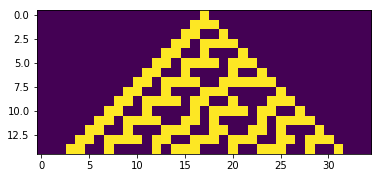

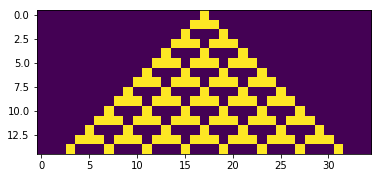

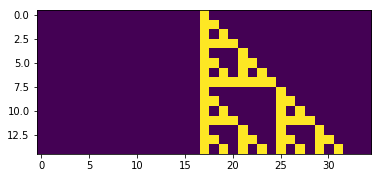

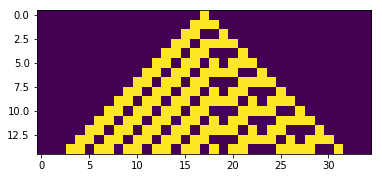

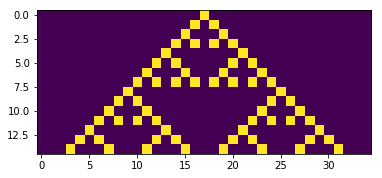

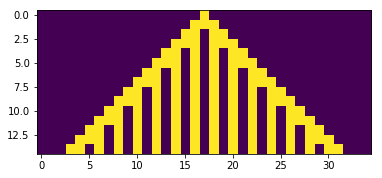

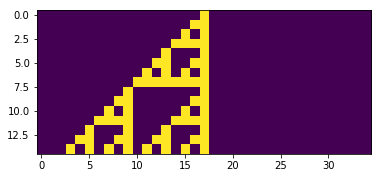

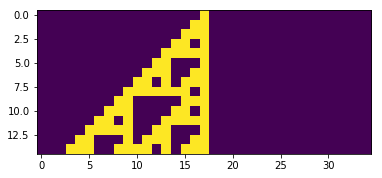

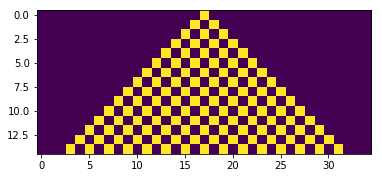

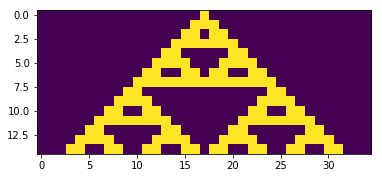

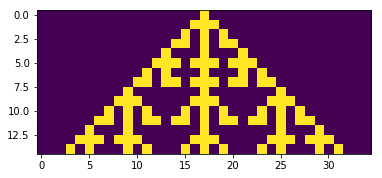

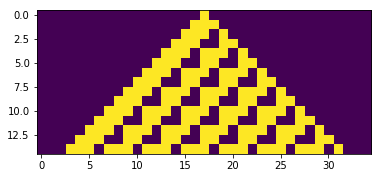

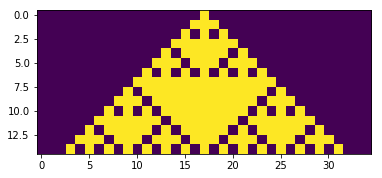

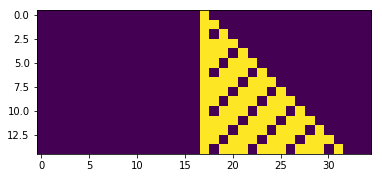

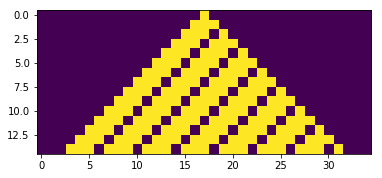

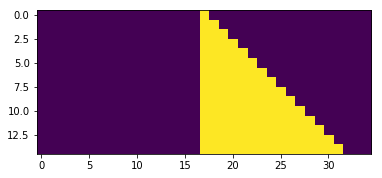

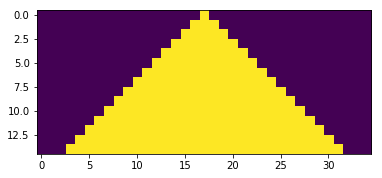

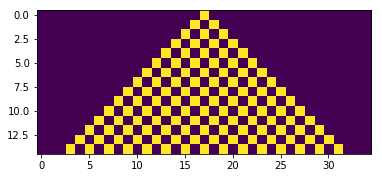

In [21]:
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, 15, 35)